# Importing the usual libraries and dataset

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [372]:
df=pd.read_excel('1 - 2019 ODI Cricket Matches.xlsx')

In [373]:
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950


# 1) Transform the Margin columns into two columns. One for run and one for wickets

In [374]:
df['Margin']=df['Margin'].astype(str)

In [375]:
#Extracting the number from the Margin columns

def get_number(competition):
    return competition.split()[0]

In [376]:
df['Number']=df['Margin'].apply(lambda x:get_number(x))

In [377]:
#Creating new columns based on the Margin columns

df['Wickets']=np.where(df['Margin'].str.contains('wickets'),df['Number'],0)
df['Runs']=np.where(df['Margin'].str.contains('runs'),df['Number'],0)


In [378]:
df.drop('Number',axis=1,inplace=True)

In [379]:
def get_type(margin):
    return margin.split()[-1]

In [385]:
df['Margin']=df['Margin'].apply(lambda x:get_type(x))

In [386]:
df

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs
0,New Zealand,Pakistan,New Zealand,runs,Wellington,2018-01-06,ODI # 3946,0,61
1,New Zealand,Pakistan,New Zealand,wickets,Nelson,2018-01-09,ODI # 3947,8,0
2,U.A.E.,Ireland,Ireland,wickets,ICCA Dubai,2018-01-11,ODI # 3948,4,0
3,New Zealand,Pakistan,New Zealand,runs,Dunedin,2018-01-13,ODI # 3949,0,183
4,U.A.E.,Ireland,Ireland,runs,ICCA Dubai,2018-01-13,ODI # 3950,0,67
...,...,...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,runs,Hobart,2018-11-11,ODI # 4069,0,40
124,New Zealand,Pakistan,no result,nan,Dubai (DSC),2018-11-11,ODI # 4070,0,0
125,Bangladesh,West Indies,Bangladesh,wickets,Dhaka,2018-12-09,ODI # 4071,5,0
126,Bangladesh,West Indies,West Indies,wickets,Dhaka,2018-12-11,ODI # 4072,4,0


# 2) Which countries has played the most ODIs in 2018

In [388]:
df['Match Date']=pd.to_datetime(df['Match Date'])

In [389]:
df.groupby('Team 1').count()['Scorecard'].sort_values(ascending=False)

Team 1
Afghanistan     16
Bangladesh      15
New Zealand     13
Sri Lanka       12
Zimbabwe        11
South Africa     9
Ireland          9
England          8
Australia        8
India            7
U.A.E.           5
Hong Kong        4
Scotland         3
West Indies      3
P.N.G.           2
Netherlands      2
Nepal            1
Name: Scorecard, dtype: int64

In [390]:
df.groupby('Team 2').count()['Scorecard'].sort_values(ascending=False)

Team 2
Pakistan        18
England         16
Zimbabwe        15
West Indies     15
India           13
South Africa     8
Scotland         8
U.A.E.           6
Sri Lanka        5
Bangladesh       5
Australia        5
Ireland          4
Afghanistan      4
P.N.G.           2
Nepal            2
Hong Kong        2
Name: Scorecard, dtype: int64

Pakistan was the team that played the most games

# 3) Top 3 countries that won the most ODIs

In [391]:
df.groupby('Winner').count()['Scorecard'].sort_values(ascending=False)

Winner
England         17
India           14
Bangladesh      13
Afghanistan     12
South Africa     9
Pakistan         8
Ireland          8
New Zealand      8
West Indies      8
Sri Lanka        6
Scotland         5
Zimbabwe         5
U.A.E.           4
tied             3
no result        2
Australia        2
P.N.G.           1
Netherlands      1
Nepal            1
Hong Kong        1
Name: Scorecard, dtype: int64

England, India and Bangladesh were the teams that won the most games

# 4) Based on the ground, map the country. Take the list from Google

In [392]:
df['Team 1'].unique()

array(['New Zealand', 'U.A.E.', 'Australia', 'Bangladesh', 'Ireland',
       'Sri Lanka', 'South Africa', 'Afghanistan', 'P.N.G.', 'Hong Kong',
       'Zimbabwe', 'Scotland', 'England', 'West Indies', 'Netherlands',
       'Nepal', 'India'], dtype=object)

In [393]:
countries_to_map={'Wellington':'New Zealand',
'Nelson':'New Zealand', 
'ICCA Dubai':'U.A.E.',
'Dunedin':'New Zealand', 
'Melbourne':'Australia',
'Dhaka':'Bangladesh', 
'Hamilton':'New Zealand', 
'Brisbane':'Australia', 
'Sydney':'Australia', 
'Adelaide':'Australia', 
'Perth':'Australia',
'Durban':'South Africa',
'Centurion':'South Africa', 
'Cape Town':'South Africa', 
'Sharjah':'U.A.E.', 
'Johannesburg':'South Africa',
'Port Elizabeth' :'England',
'Mount Maunganui' : 'New Zealand',
'Bulawayo' :'Zimbabwe',
'Harare' :'Zimbabwe',
'Christchurch' :'New Zealand',
'Edinburgh' :'Scotland',
'The Oval' :'England',
'Cardiff' :'England',
'Nottingham' :'England',
'Chester-le-Street' : 'England',
'Manchester' : 'England',
"Lord's" :'England',
'Leeds' :'England',
'Providence' :'Guyana',
'Basseterre' :'St. Kitts and Nevis',
'Dambulla' : 'Sri-Lanka',
'Amstelveen' :'Netherlands',
'Pallekele' :'Sri Lanka',
'Colombo (RPS)' :'Sri Lanka',
'Belfast' :'Northern-Ireland',
'Kuala Lumpur' :'Malysia',
'Dubai (DSC)' :'U.A.E.',
'Abu Dhabi' :'U.A.E.',
'Kimberley' :'South Africa',
'Bloemfontein' :'South Africa',
'Paarl' :'South Africa',
'Guwahati' :'India',
'Visakhapatnam' : 'India',
'Chattogram':'Bangladesh',
'Pune':'India',
'Mumbai (BS)':'India',
'Thiruvananthapuram':'India',
'Hobart':'Australia',
'Sylhet':'Bangladesh'}

In [394]:
df['Home Ground']=df['Ground'].map(countries_to_map)

# 5) Which countries played the most at home?

In [395]:
df.at[30,'Home Ground']='South Africa'

In [396]:
df['Home Team']=np.where(df['Team 1']==df['Home Ground'],df['Team 1'],
        np.where(df['Team 2']==df['Home Ground'],df['Team 2'],'Other'))

In [397]:
df.groupby('Home Team').count()['Scorecard'].sort_values(ascending=False)

Home Team
Other           53
Zimbabwe        11
Bangladesh      11
New Zealand     10
South Africa     9
England          8
Australia        8
Sri Lanka        6
India            5
U.A.E.           4
Netherlands      2
Scotland         1
Name: Scorecard, dtype: int64

Zimbabwe was the team that played the most at home

# 6) How was the performance of Sri-Lanka?

Filtering games in which Sri-Lanka was involved either as Team 1 or Team 2 

In [398]:
sri_lanka_games=df.loc[(df['Team 1']=='Sri Lanka') |  (df['Team 2']=='Sri Lanka')]

In [399]:
sri_lanka_games

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs,Home Ground,Home Team
9,Sri Lanka,Zimbabwe,Zimbabwe,runs,Dhaka,2018-01-17,ODI # 3955,0,12,Bangladesh,Other
13,Bangladesh,Sri Lanka,Bangladesh,runs,Dhaka,2018-01-19,ODI # 3959,0,163,Bangladesh,Bangladesh
16,Sri Lanka,Zimbabwe,Sri Lanka,wickets,Dhaka,2018-01-21,ODI # 3962,5,0,Bangladesh,Other
19,Bangladesh,Sri Lanka,Sri Lanka,wickets,Dhaka,2018-01-25,ODI # 3965,10,0,Bangladesh,Bangladesh
21,Bangladesh,Sri Lanka,Sri Lanka,runs,Dhaka,2018-01-27,ODI # 3967,0,79,Bangladesh,Bangladesh
79,Sri Lanka,South Africa,South Africa,wickets,Dambulla,2018-07-29,ODI # 4025,5,0,Sri-Lanka,Other
81,Sri Lanka,South Africa,South Africa,wickets,Dambulla,2018-08-01,ODI # 4027,4,0,Sri-Lanka,Other
83,Sri Lanka,South Africa,South Africa,runs,Pallekele,2018-08-05,ODI # 4029,0,78,Sri Lanka,Sri Lanka
84,Sri Lanka,South Africa,Sri Lanka,runs,Pallekele,2018-08-08,ODI # 4030,0,3,Sri Lanka,Sri Lanka
85,Sri Lanka,South Africa,Sri Lanka,runs,Colombo (RPS),2018-08-12,ODI # 4031,0,178,Sri Lanka,Sri Lanka


In [400]:
def winning_country(team):
    if team=='Sri Lanka':
        return 'Victory'
    else:
        return 'Defeat'

In [401]:
sri_lanka_games['Winner']=sri_lanka_games['Winner'].apply(lambda x:winning_country(x))

C:\Users\Gwenn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [402]:
sri_lanka_games

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs,Home Ground,Home Team
9,Sri Lanka,Zimbabwe,Defeat,runs,Dhaka,2018-01-17,ODI # 3955,0,12,Bangladesh,Other
13,Bangladesh,Sri Lanka,Defeat,runs,Dhaka,2018-01-19,ODI # 3959,0,163,Bangladesh,Bangladesh
16,Sri Lanka,Zimbabwe,Victory,wickets,Dhaka,2018-01-21,ODI # 3962,5,0,Bangladesh,Other
19,Bangladesh,Sri Lanka,Victory,wickets,Dhaka,2018-01-25,ODI # 3965,10,0,Bangladesh,Bangladesh
21,Bangladesh,Sri Lanka,Victory,runs,Dhaka,2018-01-27,ODI # 3967,0,79,Bangladesh,Bangladesh
79,Sri Lanka,South Africa,Defeat,wickets,Dambulla,2018-07-29,ODI # 4025,5,0,Sri-Lanka,Other
81,Sri Lanka,South Africa,Defeat,wickets,Dambulla,2018-08-01,ODI # 4027,4,0,Sri-Lanka,Other
83,Sri Lanka,South Africa,Defeat,runs,Pallekele,2018-08-05,ODI # 4029,0,78,Sri Lanka,Sri Lanka
84,Sri Lanka,South Africa,Victory,runs,Pallekele,2018-08-08,ODI # 4030,0,3,Sri Lanka,Sri Lanka
85,Sri Lanka,South Africa,Victory,runs,Colombo (RPS),2018-08-12,ODI # 4031,0,178,Sri Lanka,Sri Lanka


Sri Lanka Performances
Defeat     65.0
Victory    35.0
Name: Winner, dtype: float64 %


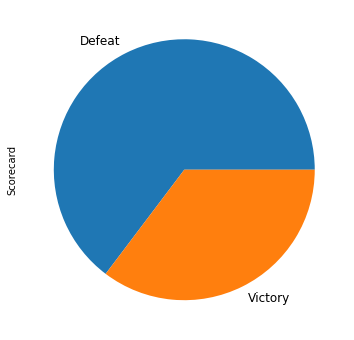

In [403]:
plt.figure(figsize=(6,6))
sri_lanka_games.groupby('Winner').count()['Scorecard'].plot.pie(fontsize=12)
print('Sri Lanka Performances')
print(sri_lanka_games['Winner'].value_counts(normalize=True).round(2)*100,'%')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

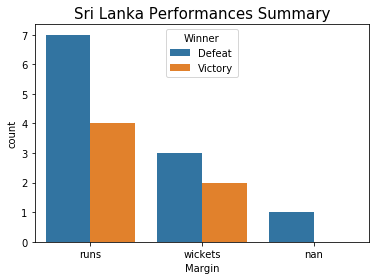

In [466]:
sns.countplot(x='Margin',data=sri_lanka_games,hue='Winner')
plt.title('Sri Lanka Performances Summary',fontsize=15)
plt.xticks(rotation=0)

In [412]:
sri_lanka_games.groupby('Winner')['Margin'].value_counts(normalize=True).round(2)*100

Winner   Margin 
Defeat   runs       64.0
         wickets    27.0
         nan         9.0
Victory  runs       67.0
         wickets    33.0
Name: Margin, dtype: float64

# 7) What are the top 3 wins by Run?

In [413]:
df['Runs']=df['Runs'].astype(int)

In [414]:
df.sort_values(by='Runs',ascending=False).head(3)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs,Home Ground,Home Team
74,Zimbabwe,Pakistan,Pakistan,runs,Bulawayo,2018-07-20,ODI # 4020,0,244,Zimbabwe,Zimbabwe
65,England,Australia,England,runs,Nottingham,2018-06-19,ODI # 4011,0,242,England,England
49,Ireland,U.A.E.,Ireland,runs,Harare,2018-03-12,ODI # 3995,0,226,Zimbabwe,Other


# 8) Find out during which month most of the ODI's were played?

In [415]:
df['Month']=df['Match Date'].dt.month

In [416]:
mmap={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [417]:
df['Month']=df['Month'].map(mmap)

In [418]:
df.groupby('Month').count()['Scorecard'].sort_values(ascending=False)

Month
Mar    26
Jan    23
Sep    14
Oct    14
Feb    13
Jul    12
Aug    10
Nov     7
Jun     6
Dec     3
Name: Scorecard, dtype: int64

March was when most of the games were played

# 9) Team which toured the most in foreign countries

In [498]:
df['Team 1 Toured']=(df['Team 1']!=df['Home Team'])
df['Team 2 Toured']=(df['Team 2']!=df['Home Team'])

In [499]:
team1_toured=df[df['Team 1 Toured']==True]
team2_toured=df[df['Team 2 Toured']==True]

In [503]:
team1_toured.groupby('Team 1').count()['Scorecard'].sort_values(ascending=False)

Team 1
Afghanistan    16
Ireland         9
Sri Lanka       6
Hong Kong       4
Bangladesh      4
West Indies     3
New Zealand     3
Scotland        2
P.N.G.          2
India           2
U.A.E.          1
Nepal           1
Name: Scorecard, dtype: int64

In [504]:
team2_toured.groupby('Team 2').count()['Scorecard'].sort_values(ascending=False)

Team 2
Pakistan        18
England         16
Zimbabwe        15
West Indies     15
India           13
South Africa     8
Scotland         8
U.A.E.           6
Sri Lanka        5
Bangladesh       5
Australia        5
Ireland          4
Afghanistan      4
P.N.G.           2
Nepal            2
Hong Kong        2
Name: Scorecard, dtype: int64

Pakistan was the team that toured the most

# 10) How many cricket matches were played every month?

In [419]:
games_per_month=df.groupby('Month').count()['Scorecard']

In [420]:
games_per_month

Month
Aug    10
Dec     3
Feb    13
Jan    23
Jul    12
Jun     6
Mar    26
Nov     7
Oct    14
Sep    14
Name: Scorecard, dtype: int64

Text(0, 0.5, 'Games count')

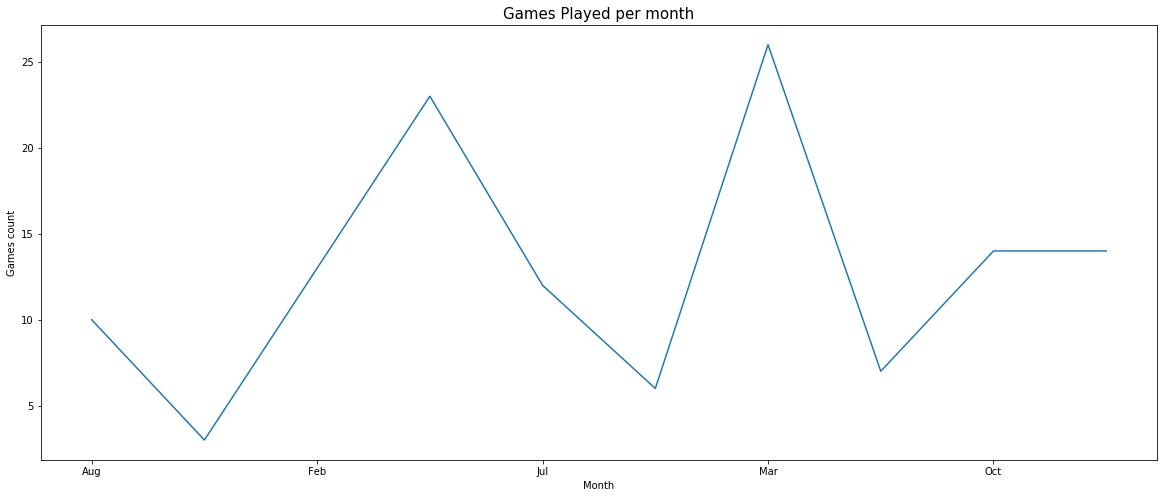

In [421]:
plt.figure(figsize=(20,8))
games_per_month.plot(linewidth=1.5)
plt.title('Games Played per month',fontsize=15)
plt.ylabel('Games count')

# 11) On wich ground most games were played?

In [422]:
df.groupby('Ground').count()['Scorecard'].sort_values(ascending=False).head(1)

Ground
Harare    16
Name: Scorecard, dtype: int64

Harare was the number one ground in terms of played games

# 12) Did India win mostly by chasing or playing first?

In [423]:
India_Wins=df[df['Winner']=='India']

In [424]:
India_Wins

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs,Home Ground,Home Team,Month
23,South Africa,India,India,wickets,Durban,2018-02-01,ODI # 3969,6,0,South Africa,South Africa,Feb
24,South Africa,India,India,wickets,Centurion,2018-02-04,ODI # 3970,9,0,South Africa,South Africa,Feb
25,South Africa,India,India,runs,Cape Town,2018-02-07,ODI # 3971,0,124,South Africa,South Africa,Feb
30,South Africa,India,India,runs,Port Elizabeth,2018-02-13,ODI # 3976,0,73,South Africa,South Africa,Feb
32,South Africa,India,India,wickets,Centurion,2018-02-16,ODI # 3978,8,0,South Africa,South Africa,Feb
68,England,India,India,wickets,Nottingham,2018-07-12,ODI # 4014,8,0,England,England,Jul
93,Hong Kong,India,India,runs,Dubai (DSC),2018-09-18,ODI # 4039,0,26,U.A.E.,Other,Sep
94,India,Pakistan,India,wickets,Dubai (DSC),2018-09-19,ODI # 4040,8,0,U.A.E.,Other,Sep
96,Bangladesh,India,India,wickets,Dubai (DSC),2018-09-21,ODI # 4042,7,0,U.A.E.,Other,Sep
98,India,Pakistan,India,wickets,Dubai (DSC),2018-09-23,ODI # 4044,9,0,U.A.E.,Other,Sep


In [425]:
India_Wins[['Wickets','Runs']]=India_Wins[['Wickets','Runs']].apply(pd.to_numeric)

C:\Users\Gwenn\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(array([0, 1]), <a list of 2 Text xticklabel objects>)

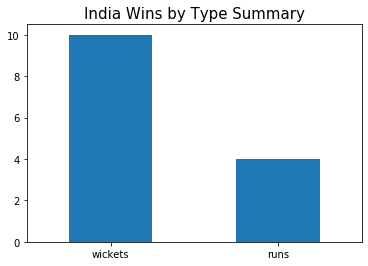

In [436]:
India_Wins['Margin'].value_counts().plot.bar()
plt.title('India Wins by Type Summary',fontsize=15)
plt.xticks(rotation=0)

# 13)Top 3 Countries which won most matches in 2018, what was their winning % every month

In [438]:
df.groupby('Winner').count()['Scorecard'].sort_values(ascending=False).head(3)

Winner
England       17
India         14
Bangladesh    13
Name: Scorecard, dtype: int64

In [439]:
England_games=df.loc[(df['Team 1']=='England') | (df['Team 2']=='England')]

In [440]:
def winner(team):
    if team=='England':
        return 'Win'
    else:
        return 'Loss'

In [441]:
England_games['Winner']=England_games['Winner'].apply(lambda x:winner(x))

C:\Users\Gwenn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [442]:
England_games.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs,Home Ground,Home Team,Month
5,Australia,England,Win,wickets,Melbourne,2018-01-14,ODI # 3951,5,0,Australia,Australia,Jan
12,Australia,England,Win,wickets,Brisbane,2018-01-19,ODI # 3958,4,0,Australia,Australia,Jan
14,Australia,England,Win,runs,Sydney,2018-01-21,ODI # 3960,0,16,Australia,Australia,Jan
20,Australia,England,Loss,wickets,Adelaide,2018-01-26,ODI # 3966,3,0,Australia,Australia,Jan
22,Australia,England,Win,runs,Perth,2018-01-28,ODI # 3968,0,12,Australia,Australia,Jan
34,New Zealand,England,Loss,wickets,Hamilton,2018-02-25,ODI # 3980,3,0,New Zealand,New Zealand,Feb
35,New Zealand,England,Win,wickets,Mount Maunganui,2018-02-28,ODI # 3981,6,0,New Zealand,New Zealand,Feb
36,New Zealand,England,Win,runs,Wellington,2018-03-03,ODI # 3982,0,4,New Zealand,New Zealand,Mar
43,New Zealand,England,Loss,wickets,Dunedin,2018-03-07,ODI # 3989,5,0,New Zealand,New Zealand,Mar
46,New Zealand,England,Win,wickets,Christchurch,2018-03-10,ODI # 3992,7,0,New Zealand,New Zealand,Mar


England Win Rate per month

In [443]:
England_games.groupby('Month')['Winner'].value_counts(normalize=True).round(2)*100

Month  Winner
Feb    Loss      50.0
       Win       50.0
Jan    Win       80.0
       Loss      20.0
Jul    Win       67.0
       Loss      33.0
Jun    Win       83.0
       Loss      17.0
Mar    Win       67.0
       Loss      33.0
Oct    Win       60.0
       Loss      40.0
Name: Winner, dtype: float64

In [444]:
India_games=df.loc[(df['Team 1']=='India') | (df['Team 2']=='India')]

In [445]:
def get_winner(team):
    if team=='India':
        return 'Win'
    else:
        return 'Loss'

In [446]:
India_games['Winner']=India_games['Winner'].apply(lambda x:get_winner(x))

C:\Users\Gwenn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


India Win Rate per month

In [447]:
India_games.groupby('Month')['Winner'].value_counts(normalize=True).round(2)*100

Month  Winner
Feb    Win        83.0
       Loss       17.0
Jul    Loss       67.0
       Win        33.0
Nov    Win       100.0
Oct    Loss       50.0
       Win        50.0
Sep    Win        83.0
       Loss       17.0
Name: Winner, dtype: float64

In [448]:
Bangladesh_games=df.loc[(df['Team 1']=='Bangladesh') | (df['Team 2']=='Bangladesh')]

In [449]:
def get_winner(team):
    if team=='Bangladesh':
        return 'Win'
    else:
        return 'Loss'

In [450]:
Bangladesh_games['Winner']=Bangladesh_games['Winner'].apply(lambda x:get_winner(x))

C:\Users\Gwenn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Bangladesh Win Rate per month

In [451]:
Bangladesh_games.groupby('Month')['Winner'].value_counts(normalize=True).round(2)*100

Month  Winner
Dec    Win        67.0
       Loss       33.0
Jan    Win        60.0
       Loss       40.0
Jul    Win        67.0
       Loss       33.0
Oct    Win       100.0
Sep    Loss       50.0
       Win        50.0
Name: Winner, dtype: float64

# 14) Team which lost most of its matches

In [453]:
df['Loser']=np.where(df['Winner']==df['Team 1'],df['Team 2'],df['Team 1'])

In [454]:
df.groupby('Loser').count()['Scorecard'].sort_values(ascending=False).head(1)

Loser
Zimbabwe    21
Name: Scorecard, dtype: int64

Zimbabwe is the team that lost most of its matches

# 15) Did this team lost its matches by chasing or playing first? 

In [455]:
Zimbabwe_losses=df[df['Loser']=='Zimbabwe']

In [456]:
Zimbabwe_losses

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs,Home Ground,Home Team,Month,Loser
6,Bangladesh,Zimbabwe,Bangladesh,wickets,Dhaka,2018-01-15,ODI # 3952,8,0,Bangladesh,Bangladesh,Jan,Zimbabwe
16,Sri Lanka,Zimbabwe,Sri Lanka,wickets,Dhaka,2018-01-21,ODI # 3962,5,0,Bangladesh,Other,Jan,Zimbabwe
18,Bangladesh,Zimbabwe,Bangladesh,runs,Dhaka,2018-01-23,ODI # 3964,0,91,Bangladesh,Bangladesh,Jan,Zimbabwe
26,Afghanistan,Zimbabwe,Afghanistan,runs,Sharjah,2018-02-09,ODI # 3972,0,154,U.A.E.,Other,Feb,Zimbabwe
29,Afghanistan,Zimbabwe,Afghanistan,wickets,Sharjah,2018-02-13,ODI # 3975,6,0,U.A.E.,Other,Feb,Zimbabwe
31,Afghanistan,Zimbabwe,Afghanistan,wickets,Sharjah,2018-02-16,ODI # 3977,10,0,U.A.E.,Other,Feb,Zimbabwe
33,Afghanistan,Zimbabwe,Afghanistan,runs,Sharjah,2018-02-19,ODI # 3979,0,146,U.A.E.,Other,Feb,Zimbabwe
50,Zimbabwe,Scotland,tied,nan,Bulawayo,2018-03-12,ODI # 3996,0,0,Zimbabwe,Zimbabwe,Mar,Zimbabwe
56,Zimbabwe,West Indies,West Indies,wickets,Harare,2018-03-19,ODI # 4002,4,0,Zimbabwe,Zimbabwe,Mar,Zimbabwe
59,Zimbabwe,U.A.E.,U.A.E.,runs,Harare,2018-03-22,ODI # 4005,0,3,Zimbabwe,Zimbabwe,Mar,Zimbabwe


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

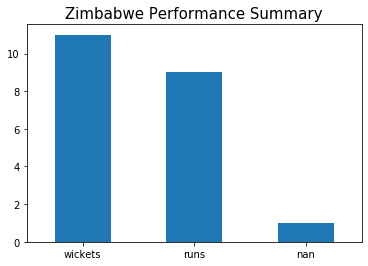

In [462]:
Zimbabwe_losses['Margin'].value_counts().plot.bar()
plt.title('Zimbabwe Performance Summary',fontsize=15)
plt.xticks(rotation=0)